![title](1579159122(1).jpg)

##### 有三类集成算法：装袋法（Bagging），提升法（Boosting）和stacking
#####  装袋法的核心思想是构建多个相互独立的评估器，然后对其预测进行平均或多数表决原则来决定集成评估器的结果，
##### 装袋法的代表模型就是随机模型
##### 提升法中，基评估器是相关的，是按顺序一一构建的，其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器，提升法的代表模型有Adaboost和梯度提升树

### sklearn中的集成算法模块ensemble
##### ensemble.AdaBoostClassifier    AdaBoost分类
##### ensemble.AdaBoostRegressor    Adaboost回归
##### ensemble.BaggingClassifier    装袋分类器
##### ensemble.BaggingRegressor    装袋回归器
##### ensemble.ExtraTreesClassifier    Extra-trees分类（超树，极端随机树）
##### ensemble.ExtraTreesRegressor    Extra-trees回归
##### ensemble.GradientBoostingClassifier     梯度提升分类
##### ensemble.GradientBoostingRegressor    梯度提升回归
##### ensemble.IsolationForest    隔离森林
##### ensemble.RandomForestClassifier    随机森林分类
##### ensemble.RandomForestRegressor    随机森林回归
##### ensemble.RandomTreesEmbedding    完全随机树的集成
##### ensemble.VotingClassifier    用于不合适估算器的软投票/多数规则分类器

### RandomForestClassifier
classsklearn.ensemble.RandomForestClassifier(n_estimators=’10’, criterion=’gini’, max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’,max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
随机森林是非常具有代表性的Bagging集成算法，它的所有基评估器都是决策树，分类树组成的森林就叫做随机森林分类器，回归树所集成的森林就叫做随机森林回归器。

n_estimators 森林中树木的数量，即基评估器的数量，这个参数对随机森林的精确性是单调的，n_estimators越大，
模型的效果往往越好

In [3]:
%matplotlib inline 
#在画图时需要的环境
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [9]:
#单个分类树和随机森林分类树对比
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c),
     "Random Forest:{}".format(score_r))

Single Tree:1.0 Random Forest:0.9814814814814815


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


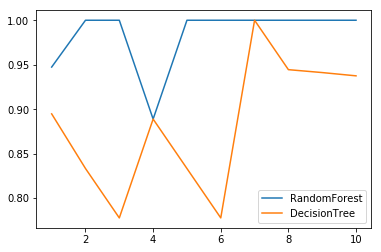

In [10]:
# 交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='RandomForest') # range(1,11) X的取值 rfc_s y的取值
plt.plot(range(1,11),clf_s,label='DecisionTree')
plt.legend() #显示label
plt.show()

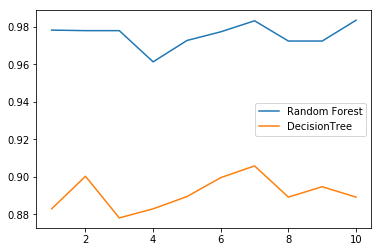

In [14]:
'''画出十组交叉验证下随机森林和决策树的对比'''
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf =  DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label='Random Forest')
plt.plot(range(1,11),clf_l,label='DecisionTree')
plt.legend()
plt.show()

# 单个绝粗疏的准确率越高，随机森林的准确率越高

0.9888888888888889 31


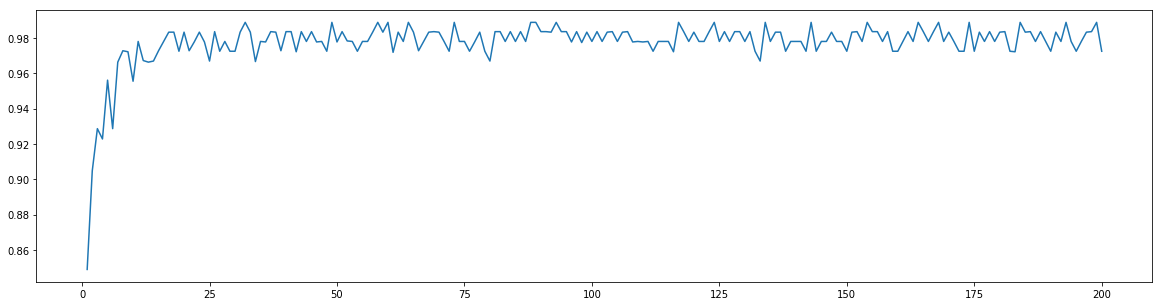

In [15]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1) #树的个数从1-200 n_jobs -1 表示整个处理器运行
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean() #十交叉验证平均值
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1) #找出分数最大的分数和树的个数
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()  

当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是用”随机挑选特征进行分枝“的方法得到的随机性。

In [16]:
# 随机森林的重要属性之一，estimators，查看森林中树的状况
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)
rfc.estimators_  #森林中所有树的状况

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [17]:
# 也可以这样查看树中的某一个值
rfc.estimators_[0].random_state

1872583848

In [18]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


#### 要让基分类器尽量都不一样，一种很容易理解的方法是使用不同的训练集来进行训练，而袋装法正是通过有放回的随机抽样技术来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数。
在一个含有n个样本的原始训练集中，我们进行随机采样，每次采样一个样本，并在抽取下一个样本之前将该样本放回原始训练集，也就是说下次采样时这个样本依然可能被采集到，这样采集n次，最终得到一个和原始训练集一样大的，n个样本组成的自助集。由于是随机采样，这样每次的自助集和原始数据集不同，和其他的采样集也是不同的。这样我们就可以自由创造取之不尽用之不竭，并且互不相同的自助集，用这些自助集来训练我们的基分类器，我们的基分类器自然也就各不相同了。
##### bootstrap参数默认True，代表采用这种有放回的随机抽样技术

In [19]:
'''如果希望用袋外数据来测试，则需要在实例化时就将oob_score这个参数调整为True，训练完毕之后，我们可以用随机森林
的另一个重要属性：oob_score_来查看我们的在袋外数据上测试的结果：'''  #详见pdf版笔记

# 无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [20]:
# 重要属性oob_score
rfc.oob_score_ #袋外数据在随机森林上的准确率

0.9775280898876404

In [21]:
rfc.feature_importances_

array([0.11435852, 0.03382981, 0.01011406, 0.02619923, 0.0419067 ,
       0.06163294, 0.15815448, 0.02426438, 0.02330612, 0.13937153,
       0.08607338, 0.10138653, 0.17940231])

In [22]:
# 其他属性和接口
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)
rfc.feature_importances_
rfc.apply(Xtest) #返回每一个样本在每个树中的叶子结点的索引
rfc.predict(Xtest) #预测结果
rfc.predict_proba(Xtest) #每一个测试样本被分到每一类的概率，得到一个平均的概率，从而决定测试样本的分类

array([[0.  , 0.8 , 0.2 ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.08, 0.2 , 0.72],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.92, 0.08],
       [0.  , 1.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.24, 0.68, 0.08],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.64, 0.36],
       [0.  , 0.96, 0.04],
       [0.08, 0.8 , 0.12],
       [0.96, 0.04, 0.  ],
       [0.  , 0.84, 0.16],
       [1.  , 0.  , 0.  ],
       [0.04, 0.64, 0.32],
       [0.  , 0.92, 0.08],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.68, 0.32, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.92, 0.04, 0.04],
       [0.  , 0.96, 0.04],
       [0.68, 0.32, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.12, 0.8 , 0.08],
       [0.04, 0.  , 0.96],
       [0.04, 0.72, 0.24],
       [0.96, 0.04, 0.  ],
 

# Bagging的另一个必要条件
在使用袋装法时要求基评估器要尽量独立。其实，袋装法还有另一个必要条件：基分类器的判断准确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%。之前我们已经展示过随机森林的准确率公式，基于这个公式，我们画出了基分类器的误差率ε和随机森林的误差率之间的图像。大家可以自己运行一下这段代码，看看图像呈什么样的分布。

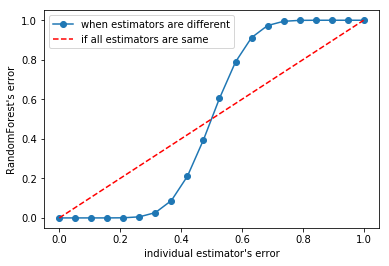

In [24]:
import numpy as np
from scipy.special import comb
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20): # 基分类器误差间隔取值
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different") #当基分类器（树）不同
plt.plot(x,x,"--",color="red",label="if all estimators are same") #如果所有的树都相同
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()
# 单个树的错误率不能过50% 不然随机森林的分数会更差

可以从图像上看出，当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反，当基分类器的误差率大于0.5，袋装的集成算法就失效了。所以在使用随机森林之前，一定要检查，用来组成随机森林的分类树们是否都有至少50%的预测正确率。

# RandomForestRegressor
classsklearn.ensemble.RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’,max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,n_jobs=None, random_state=None, verbose=0, warm_start=False)所有的参数，属性与接口，全部和随机森林分类器一致。仅有的不同就是回归树与分类树的不同，不纯度的指标，参数Criterion不一致。

In [25]:
'''与决策树相同
criterion：1)mse 均方误差mean squared error(MSE) 
           2)friedman_mse 费尔德曼均方误差
           3)mae 绝对平均误差MAE  #详情见pdf版笔记
'''

'与决策树相同\ncriterion：1)mse 均方误差mean squared error(MSE) \n           2)friedman_mse 费尔德曼均方误差\n           3)mae 绝对平均误差MAE  #详情见pdf版笔记\n'

In [27]:
from sklearn.datasets import load_boston #一个标签是连续型变量的数据集
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0) #实例化
cross_val_score(regressor,boston.data,boston.target,cv=10,
               scoring = 'neg_mean_squared_error') #打分的标准是neg_mean_squared_error即均方误差 否则默认的R平方

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [31]:
#sklearn当中的模型评估指标（打分）列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']